Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

 Example 1 - A simple cost function

 $$f(x) = x^2 + x + 1$$ 

In [3]:
def f(x):
    return x**2 + x + 1 

In [4]:
# Generating Data
x_1 = np.linspace(start=-3, stop=3, num=500)


array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

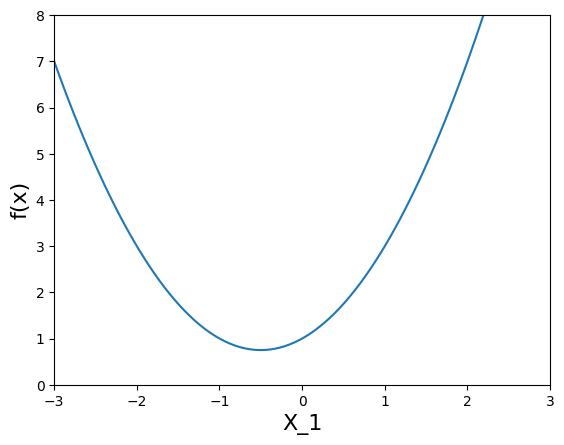

In [6]:
# Plot generated data - feed generated data through simple cost function and plot against x_1
plt.xlim([-3, 3])
plt.ylim([0,8])
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

Slope & Derivatives

In [7]:
def df(x):
    return 2*x + 1

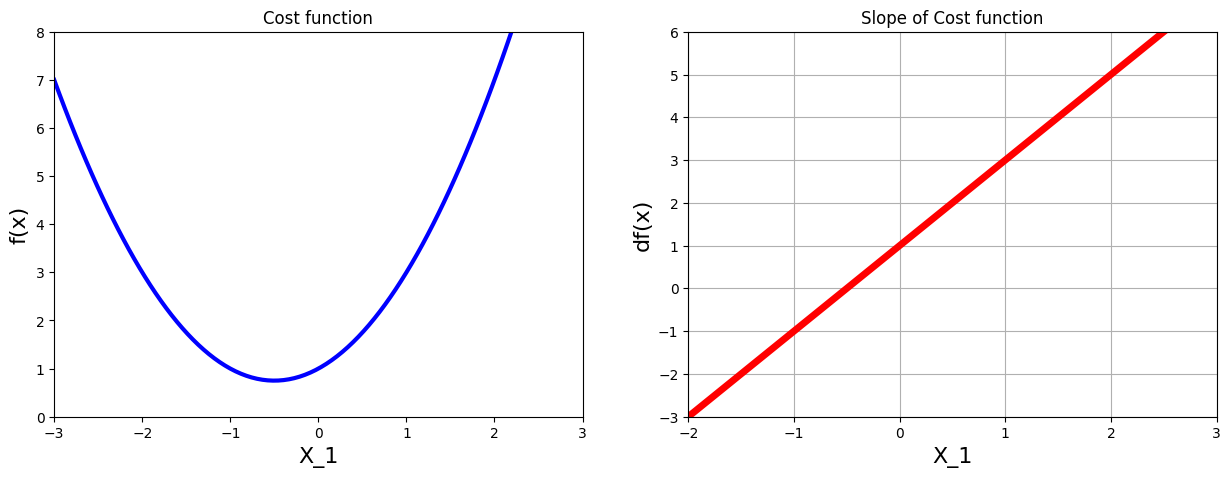

In [16]:
# Plot simple cost function and derivative of simple cost function side by side 

plt.figure(figsize=[15,5])

#Plot 1 - Simple Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.title('Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#Plot 2 - Derivative 
plt.subplot(1, 2, 2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of Cost function')
plt.xlabel('X_1', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='red', linewidth=5)

plt.show()



Gradient Descent

In [17]:
new_x = 3
previous_x = 0
step_multiplier = 0.1

for n in range(30):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

print("local minimum occurs at: ", new_x)
print("slope/df(x): value at this point is: ", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

local minimum occurs at:  -0.4956672098625011
slope/df(x): value at this point is:  0.008665580274997753
f(x) value or cost at this point is: 0.7500187730703756
